# Problem Statement: Predict whether income exceeds $50K/yr based on census data.Alsoknown as the "Census Income" dataset

## Data Cleaning

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV

In [101]:
df = pd.read_csv(".\\Problem statement 1_dataset\\adult.csv")

In [79]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [80]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [82]:
df.shape

(32561, 15)

In [83]:
df.duplicated().sum()

24

In [84]:
df.drop_duplicates()
df.shape

(32561, 15)

In [85]:
cat_feat = df.select_dtypes(include=['object']).columns
cat_feat

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'country', 'salary'],
      dtype='object')

#### The number of missing value isn’t relevant

In [86]:
print('% of missing values :')
for c in cat_feat:
    perc = len(df[df[c] == '?']) / df.shape[0] * 100
    print(c, f'{perc:.1f} %')

% of missing values :
workclass 0.0 %
education 0.0 %
marital-status 0.0 %
occupation 0.0 %
relationship 0.0 %
race 0.0 %
sex 0.0 %
country 0.0 %
salary 0.0 %


In [87]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## Exploratary Data Analysis

In [88]:
print(f"Ratio above 50k : {(df['salary'] == '>50K').astype('int').sum() / df.shape[0] * 100 :.2f}%")

Ratio above 50k : 24.08%


In [89]:
num_feat = df.select_dtypes(include=['int64']).columns
num_feat

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

<Figure size 1152x720 with 0 Axes>

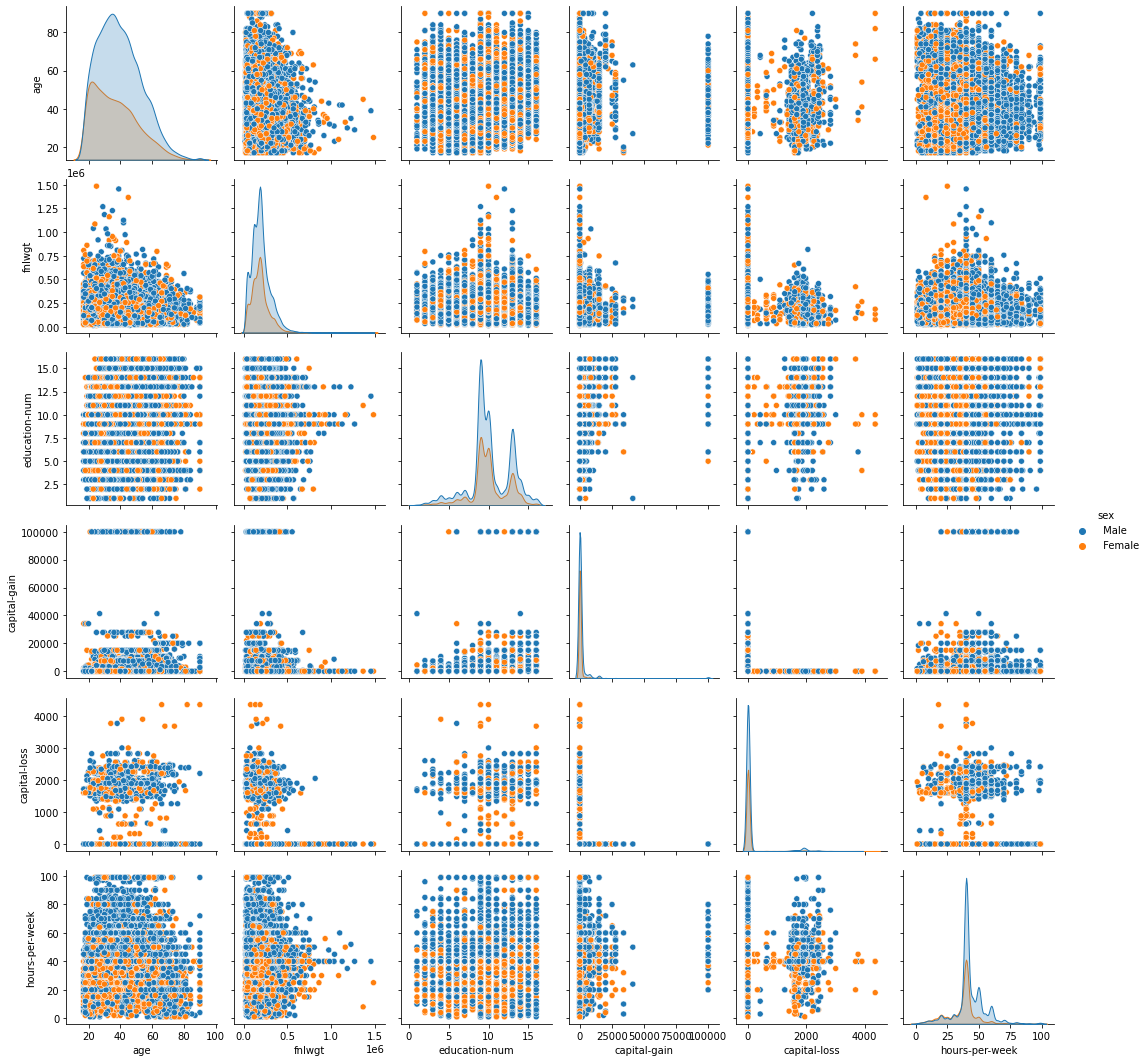

In [90]:
plt.figure(1, figsize=(16,10))
sns.pairplot(data=df, hue='sex')
plt.show()

## Distribution of numerical Values

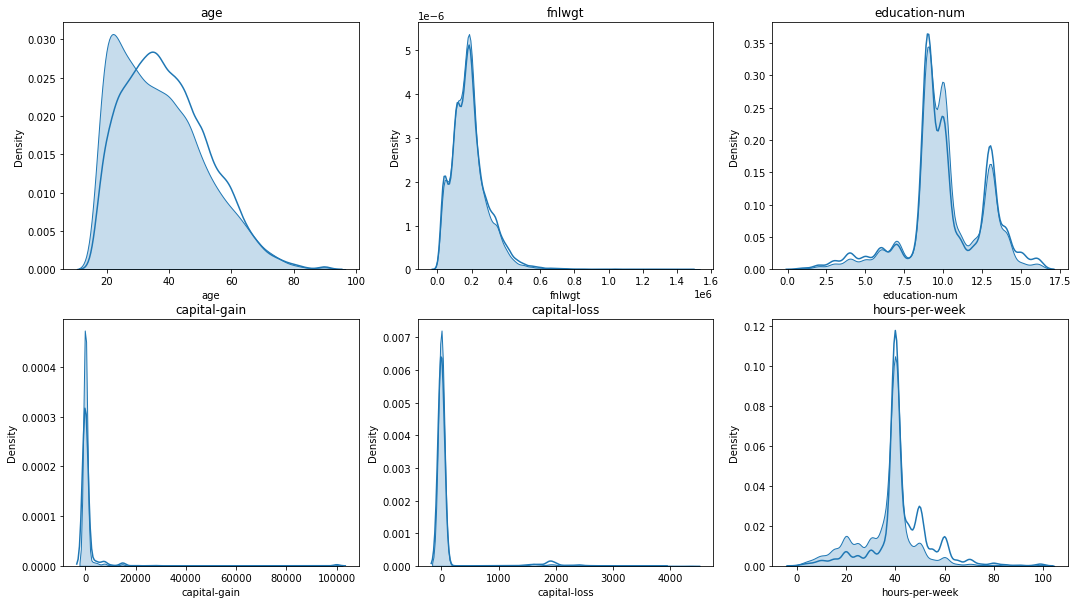

In [102]:
plt.figure(figsize=(18,10))
plt.subplot(231)

i=0
for c in num_feat:
    plt.subplot(2, 3, i+1)
    i += 1
    sns.kdeplot(df[df['sex'] == 'Female'][c], shade=True, )
    sns.kdeplot(df[df['sex'] == 'Male'][c], shade=False)
    plt.title(c)

plt.show()

## There are significant differences when it comes to capital gain / loss and hours per week.

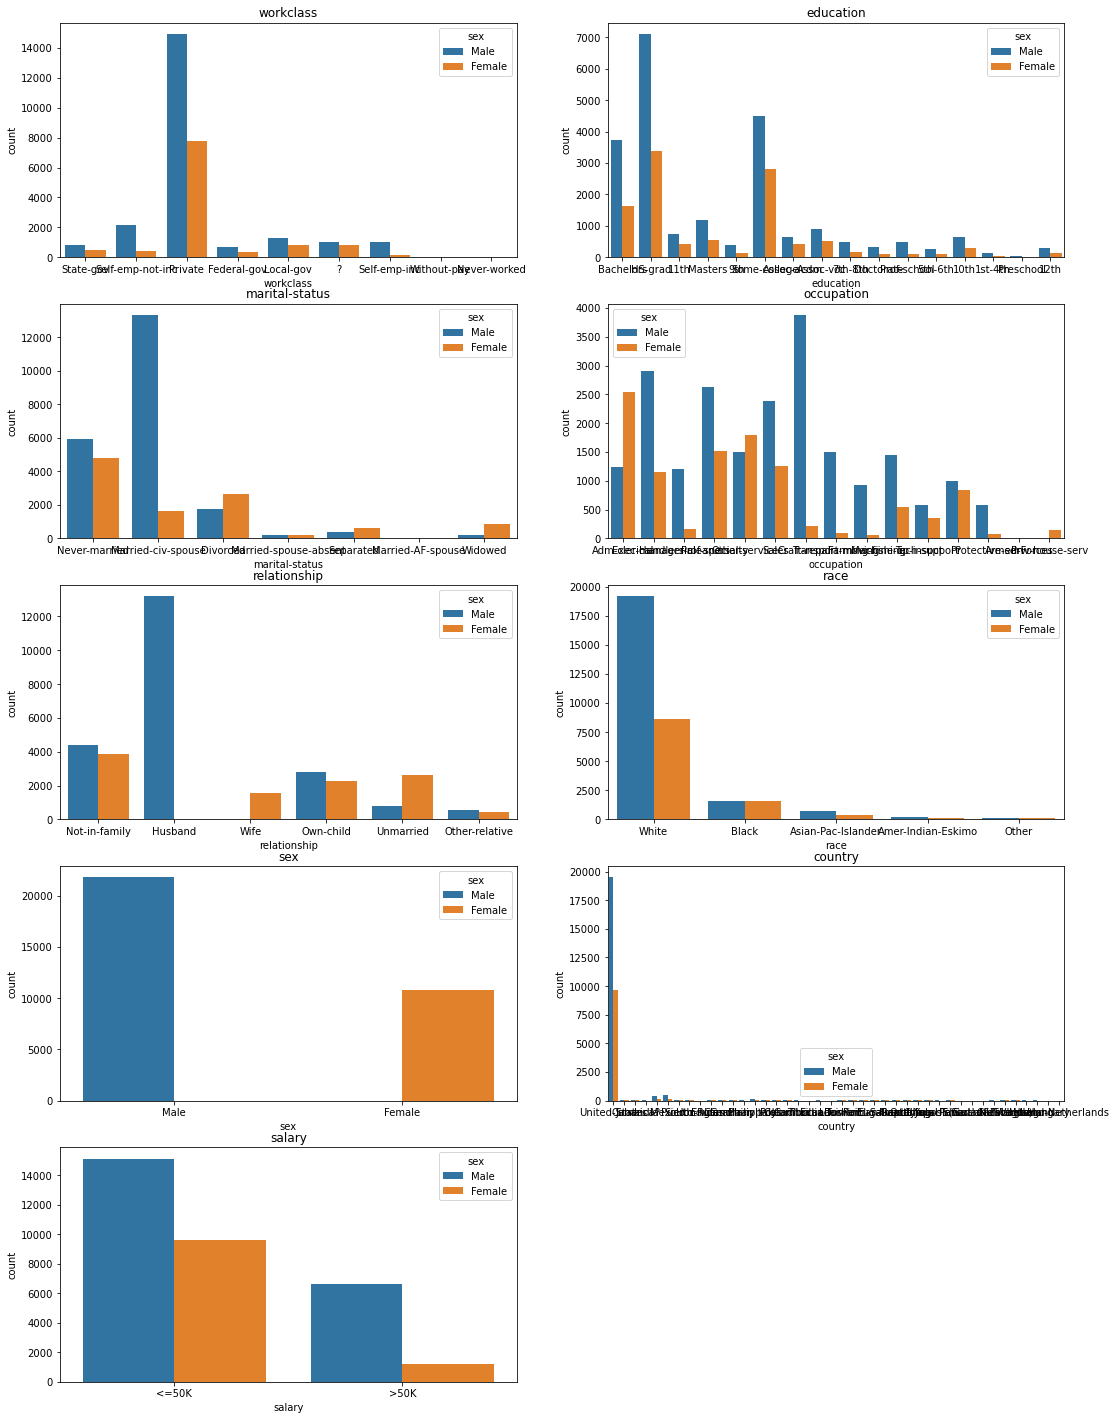

In [103]:
plt.figure(figsize=(18,25))
plt.subplot(521)

i=0
for c in cat_feat:
    plt.subplot(5, 2, i+1)
    i += 1
    sns.countplot(x=c, data=df, hue='sex')
    plt.title(c)

plt.show()

## There are far more male earning >50k than female, but at the same time there are also more male earning <50k and even more males recorded in general. The counts need to be normalized.


In [104]:
# nb of female / male
nb_female = (df.sex == 'Female').astype('int').sum()
nb_male = (df.sex == 'Male').astype('int').sum()
nb_female, nb_male

(10771, 21790)

In [105]:
nb_male_above = len(df[(df.salary == '>50K') & (df.sex == 'Male')])
nb_male_below = len(df[(df.salary == '<=50K') & (df.sex == 'Male')])
nb_female_above = len(df[(df.salary == '>50K') & (df.sex == 'Female')])
nb_female_below = len(df[(df.salary == '<=50K') & (df.sex == 'Female')])
nb_male_above, nb_male_below, nb_female_above, nb_female_below

(6662, 15128, 1179, 9592)

In [106]:
print(f'Among Males   : {nb_male_above/nb_male*100:.0f}% earn >50K // {nb_male_below/nb_male*100:.0f}% earn <=50K')
print(f'Among Females : {nb_female_above/nb_female*100:.0f}% earn >50K // {nb_female_below/nb_female*100:.0f}% earn <=50K')

Among Males   : 31% earn >50K // 69% earn <=50K
Among Females : 11% earn >50K // 89% earn <=50K


In [107]:
nb_male_above /= nb_male 
nb_male_below /= nb_male
nb_female_above /= nb_female
nb_female_below /= nb_female
nb_male_above, nb_male_below, nb_female_above, nb_female_below

(0.3057365764111978,
 0.6942634235888022,
 0.10946058861758426,
 0.8905394113824158)

In [108]:
print(f'Among people earning >50K  : {nb_male_above / (nb_male_above + nb_female_above) *100 :.0f}% are Females and {nb_female_above / (nb_male_above + nb_female_above) *100 :.0f}% are Males')
print(f'Among people earning =<50K : {nb_male_below / (nb_male_below + nb_female_below) *100 :.0f}% are Females and {nb_female_below / (nb_male_below + nb_female_below) *100 :.0f}% are Males')

Among people earning >50K  : 74% are Females and 26% are Males
Among people earning =<50K : 44% are Females and 56% are Males
